In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('dataset.txt', sep=';')
#df.head()
df=df.replace('?',np.nan)

C:\Users\anasm\AppData\Local\Temp\ipykernel_21984\2143743151.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('dataset.txt', sep=';')


In [3]:
print(df['Sub_metering_3'].mean(), df['Sub_metering_3'].std())
# print(df['Sub_metering_2'].mean(), df['Sub_metering_2'].std())
# print(df['Sub_metering_1'].mean(), df['Sub_metering_1'].std())
# print(df['Global_intensity'].mean(), df['Global_intensity'].std())
# print(df['Global_reactive_power'].mean(), df['Global_reactive_power'].std())
# print(df['Global_active_power'].mean(), df['Global_active_power'].std())

6.45844735712055 8.437153908665472


In [4]:
# converting columns to their respective data types
df['Date'] = df['Date'].astype('datetime64[ns]')
df["Time"] = pd.to_datetime(df["Time"])

df = df.astype({"Global_active_power": float, "Global_reactive_power": float, "Voltage": float, "Global_intensity": float, "Sub_metering_1": float, "Sub_metering_2": float, "Sub_metering_3":float})

C:\Users\anasm\AppData\Local\Temp\ipykernel_21984\1165988328.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Time"] = pd.to_datetime(df["Time"])


In [5]:
df['Total Power']=df['Global_active_power']+df["Global_reactive_power"]
df=df.drop(['Global_active_power', 'Global_reactive_power'], axis=1)

In [6]:
df2=df.drop(['Time', 'Date'], axis=1)
print(df.dtypes)

Date                datetime64[ns]
Time                datetime64[ns]
Voltage                    float64
Global_intensity           float64
Sub_metering_1             float64
Sub_metering_2             float64
Sub_metering_3             float64
Total Power                float64
dtype: object


In [7]:
df.corr(method='pearson')

,Date,Time,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total Power
Date,1.000000,-0.000637,0.261491,-0.037061,-0.012802,-0.036326,0.061151,-0.026563
Time,-0.000637,1.000000,-0.175491,0.281825,0.108374,0.087045,0.113756,0.286064
Voltage,0.261491,-0.175491,1.000000,-0.411363,-0.195976,-0.167405,-0.268172,-0.399147
Global_intensity,-0.037061,0.281825,-0.411363,1.000000,0.489298,0.440347,0.626543,0.995869
Sub_metering_1,-0.012802,0.108374,-0.195976,0.489298,1.000000,0.054721,0.102571,0.482323
Sub_metering_2,-0.036326,0.087045,-0.167405,0.440347,0.054721,1.000000,0.080872,0.435679
Sub_metering_3,0.061151,0.113756,-0.268172,0.626543,0.102571,0.080872,1.000000,0.628304
Total Power,-0.026563,0.286064,-0.399147,0.995869,0.482323,0.435679,0.628304,1.000000


In [8]:
from seaborn import heatmap
#help(heatmap)

<Axes: >

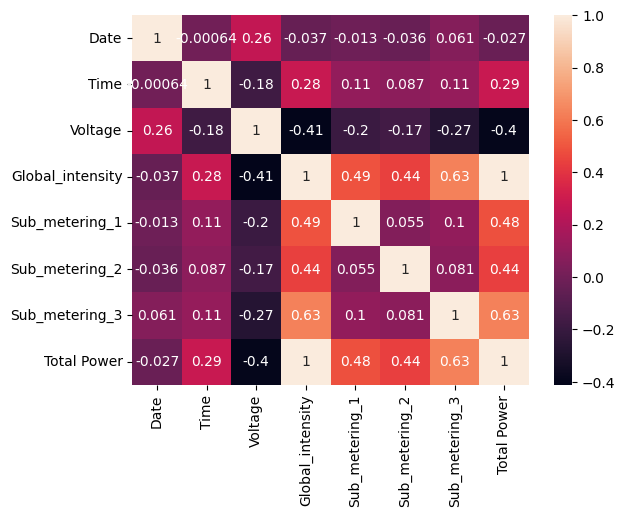

In [9]:
heatmap(df.corr(method='pearson'), annot=True)

In [10]:
df.iloc[0]

Date                2006-12-16 00:00:00
Time                2024-08-31 17:24:00
Voltage                          234.84
Global_intensity                   18.4
Sub_metering_1                      0.0
Sub_metering_2                      1.0
Sub_metering_3                     17.0
Total Power                       4.634
Name: 0, dtype: object

In [11]:
for i in df.columns:
    try:
        print(f'mean of {i}={df[i].mean()} std of {i}={df[i].std()}')
    except:
        pass

mean of Date=2008-12-07 03:35:54.011041280 std of Date=418 days 00:20:40.850787464
mean of Time=2024-08-31 11:59:32.744808704 std of Time=0 days 06:55:41.677081176
mean of Voltage=240.8398579745079 std of Voltage=3.2399866790095677
mean of Global_intensity=4.627759310587133 std of Global_intensity=4.4443962597861635
mean of Sub_metering_1=1.1219233096502186 std of Sub_metering_1=6.153031089701348
mean of Sub_metering_2=1.2985199679887571 std of Sub_metering_2=5.822026473177505
mean of Sub_metering_3=6.45844735712055 std of Sub_metering_3=8.437153908665472
mean of Total Power=1.2153295128044965 std of Total Power=1.0906219858839938


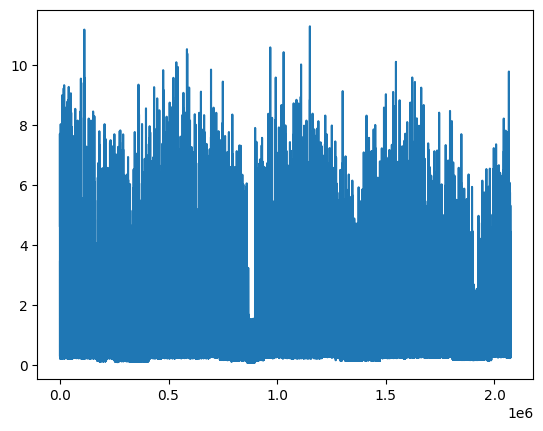

In [12]:
import matplotlib.pyplot as plt
plt.plot(df['Total Power'])

In [13]:
df=df.dropna()
x=np.array(df.drop(['Total Power','Date', 'Time'], axis=1 ))

In [14]:
y=np.array(df['Total Power'])

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
ridge_reg=Ridge(alpha=1)
ridge_reg.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [19]:
y_pred_train = ridge_reg.predict(X_train_scaled)
y_pred_test = ridge_reg.predict(X_test_scaled)

In [20]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')


Train MSE: 0.009578026214446651
Test MSE: 0.009560889910102045


In [21]:
df['Time'] = df['Time'].dt.time

In [22]:
df.head(5)

,Date,Time,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total Power
0,2006-12-16,17:24:00,234.84,18.4,0.0,1.0,17.0,4.634
1,2006-12-16,17:25:00,233.63,23.0,0.0,1.0,16.0,5.796
2,2006-12-16,17:26:00,233.29,23.0,0.0,2.0,17.0,5.872
3,2006-12-16,17:27:00,233.74,23.0,0.0,1.0,17.0,5.890
4,2006-12-16,17:28:00,235.68,15.8,0.0,1.0,17.0,4.194
